In [2]:
import matplotlib.pyplot as plt                 # Библеотека для работы с графиками
from tensorflow.keras.datasets import mnist     # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # загружаем данные они имеют вид
                                                            # x_train.shape=(60000,28,28) т.е 60к изображений размером 28 на 28 пикселей в градациях серого,
                                                            # x_test имеет размер (10000,28,28)
                                                            # цвет пикселя варьируется от 0 до 255, но
                                                            # нейронная сеть не может нормально воспринимать такие
                                                            # значения поэтому мы их разделим на 255
x_test = x_test / 255
y_test_cat = keras.utils.to_categorical(y_test, 10)


# тренировочную выборку мы не меняем так как она в нашем генераторе сама видоизмениться

In [3]:
model = keras.Sequential([
    # Conv2D принимает в первую очередь количество каналов, размер свёрточного нейрона ,padding - формирует
    # дополнительные строки и столбцы у входного канала изображения (они ровны 0), так же функцию активации
    Conv2D(16, (2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling2D принимает размер "свертки"(int, int) и так же как и Conv2D есть параметр
    # strides - шаг через который мы смотрим максимальное значение например 2 значит, что изображение уменьшиться 2 раза ,так как шаг равен 2 и мы не каждый следующий срез нейронов смотрим.
    # padding грубо говоря есть
    MaxPooling2D((2, 2), strides=2),                        #
    Conv2D(32, (2, 2), padding='same', activation='relu'),  #
    MaxPooling2D((2, 2), strides=2),                        #
    Conv2D(64, (2, 2), padding='same', activation='relu'),  #
    Flatten(),
    # Flatten преобразует выход предыдущего в вектор shape = (,64*7*7)
    Dropout(0.15),
    Dense(64, activation='relu'),                           # Обычный слой неронов
    Dense(10, activation='softmax')                         #
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [4]:
model.compile(optimizer="adam",                 # Выбераю оптимизатор для модели
              loss='categorical_crossentropy',  # Выбираю ошибку
              metrics=['accuracy'])             # Метрика оценки работы сети

import extensionbase

sd = 50    #количество на сколько разделитсья база данных
gen = extensionbase.gen_extension_base(x_train, y_train, size_drop=sd)
# x_train и y_train нужно передавать в исходном виде т.к все в коде преобразуются

ah = []  #  Списки для оценки
av = []

for j in range(1):  # Количество эпох
    for i in range(sd):
        x, y = next(gen)     # получаем кусочек данных
        his = model.fit(x, y, batch_size=77, validation_split=0.25, shuffle=True)
        # validation_split=0.25 значит что 25% данных уходит на то, чтобы посмотреть как обучилась нейронная сети полсе 1 эпохи в нашем случае на кусочке данных
        ah.append(his.history["accuracy"])   # добавляем статистические данных нашей НН
        # "accuracy" - это качество обучение нашей сети на тренировочной выборке
        av.append(his.history["val_accuracy"])
        # "val_accuracy" - это качество обучение нашей сети на валидационной выборке
        print(j, i)


2023-04-06 18:37:48.668506: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


900/900 [==============================] - 16s 17ms/step - loss: 0.3325 - accuracy: 0.8932 - val_loss: 0.2969 - val_accuracy: 0.9222
0 0
900/900 [==============================] - 15s 17ms/step - loss: 0.0813 - accuracy: 0.9745 - val_loss: 0.0900 - val_accuracy: 0.9667
0 1
900/900 [==============================] - 15s 17ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.1464 - val_accuracy: 0.9636
0 2
900/900 [==============================] - 14s 16ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.2149 - val_accuracy: 0.9522
0 3
900/900 [==============================] - 15s 17ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.2880 - val_accuracy: 0.9476
0 4
900/900 [==============================] - 15s 16ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.1757 - val_accuracy: 0.9668
0 5
900/900 [==============================] - 15s 16ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.1102 - val_accuracy: 0.9729
0 6
900/900 [==============================] 

In [5]:
model.save("Model_2ep_CNN_2_2_64D_10", save_format="h5")

0.9759740233421326 % - Финальный результат сети на валидационной выборке


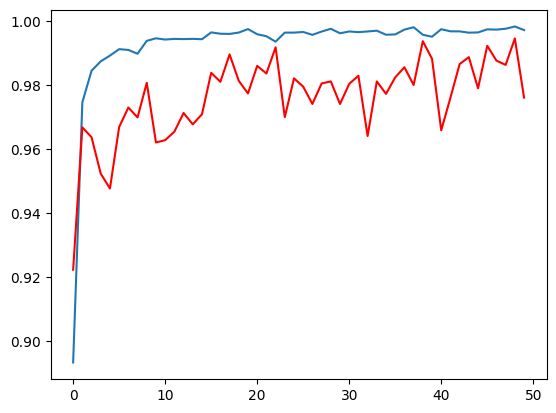

In [6]:
print(*av[-1],"% - Финальный результат сети на валидационной выборке")
plt.plot(ah)
plt.plot(av, c="r")
# Выводим графики на экран где синий - это "accuracy", a красный - это "val_accuracy"
plt.show()

In [7]:
model.evaluate(x_test / 255, y_test_cat) # 1 - "loss", 2 - "accuracy"


313/313 [==============================] - 1s 3ms/step - loss: 2.4158 - accuracy: 0.0974


[2.4157707691192627, 0.09740000218153]